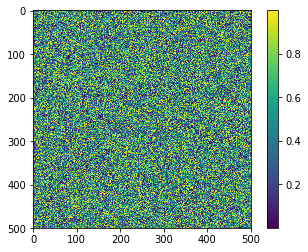

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

randimg = np.random.random([500,500])
plt.imshow(randimg)
plt.colorbar()

In [ ]:
import glob
from PIL import Image

filelist = glob.glob('Shirt - n04197391')

array = np.array([np.array(Image.open(fname)) for fname in filelist])

In [ ]:
datasetShirts = array[0:200]

In [ ]:
import scipy.misc

plt.imshow(np.array(Image.fromarray(datasetShirts[0]).resize(datasetShirts[0],size=(100,100))))
plt.gray() 
plt.show()

plt.imshow(datasetShirts[1])


IndexError: ignored

In [ ]:
import PIL

baseheight = 560
img = datasetShirts[1]
hpercent = (baseheight / float(len(img[1])))
wsize = int((float(len(img[0])) * float(hpercent)))

print(wsize, baseheight)

img = img.resize((wsize, baseheight), PIL.Image.ANTIALIAS)

In [ ]:
len(img[1])


test = datasetShirts[4]
plt.imshow(test)

In [ ]:

import glob
filelist2 = glob.glob('C:/Users/lalo_/Documents/Minerva/CS156/Study Guide/Datasets/JerseyDataset/*.JPEG')
array2 = np.array([np.array(Image.open(fname)) for fname in filelist2])

In [ ]:
datasetJersey = array2[0:200]

In [ ]:
plt.imshow(datasetJersey[10])


# For loop classifying clothes 


In [ ]:
labels = []

for i in range(200):
    labels.append("Shirt")


for i in range(200):
    labels.append("Jersey")

np.asarray(labels)

In [ ]:
masterDataset = np.concatenate((datasetShirts, datasetJersey), axis=0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io, color
from skimage.transform import resize

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])


TranformedData = []

for i in range(len(masterDataset)):
    temp = rgb2gray(masterDataset[i])
    temp2 = resize(temp, (256, 256)).flatten()
    TranformedData.append(temp2)


print(len(masterDataset),len(labels))


In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(TranformedData, labels, test_size=0.05)



In [ ]:
from sklearn import neighbors, datasets

knn = neighbors.KNeighborsClassifier(3)
knn.fit(X_train,y_train)


In [ ]:
from sklearn import neighbors, datasets

knn = neighbors.KNeighborsClassifier(3)
knn.fit(X_train,y_train)

In [ ]:
test = 399

plt.imshow(masterDataset[test])
knn.predict(TranformedData[test].reshape(1, -1))

In [ ]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test

cross_val_score(knn, X_test, y_test)

In [ ]:
from sklearn.decomposition import RandomizedPCA

testing = masterDataset[0].flatten().reshape(750, 1000)


pca = RandomizedPCA()
pca.fit(testing)                 

In [ ]:
print(pca.explained_variance_ratio_) 

In [ ]:
histdata = []
numlist = []

for i in range(len(pca.explained_variance_ratio_)):
    histdata.append(pca.explained_variance_ratio_[i])
    numlist.append(i)
    
histdata

In [ ]:
plt.scatter(numlist, histdata)
plt.show()

In [ ]:
count = 0 
for i in range(len(histdata)):
    count = histdata[i] + count
    print("The ", i, "PC"" is worth", histdata[i], " The combined PCs to this point is", count )